In [170]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import numpy as np

### Loading Data

In [171]:
feedback_df = pd.read_csv('../abschluss-daten/feedback.csv')
device_df = pd.read_csv('../abschluss-daten/feedback.csv')
participant_df = pd.read_csv('../abschluss-daten/participant.csv')

In [172]:
def parse_timestamp(timestamp):
    date_str = timestamp.split('T')[0]
    time_str = timestamp.split('T')[1]

    return datetime.datetime.fromisoformat(date_str + ' ' + time_str[:5])

In [173]:
for column_name in feedback_df.columns:
    if 'timestamp' in column_name or 'At' in column_name:
        feedback_df[column_name] = feedback_df[column_name].dropna().apply(parse_timestamp)

for column_name in device_df.columns:
    if 'timestamp' in column_name or 'At' in column_name:
        device_df[column_name] = device_df[column_name].dropna().apply(parse_timestamp)

for column_name in participant_df.columns:
    if 'timestamp' in column_name or 'At' in column_name:
        participant_df[column_name] = participant_df[column_name].dropna().apply(parse_timestamp)


Seperating the files from feedback_df

In [174]:
# daily_airDraft_df = feedback_df[['daily_airDraft_timestamp','daily_airDraft_value']].dropna()
# daily_ambientSounds_df = feedback_df[['daily_ambientSounds_timestamp','daily_ambientSounds_value']].dropna()
# daily_artificialLight_df = feedback_df[['daily_artificialLight_timestamp','daily_artificialLight_value']].dropna()
# daily_dayLight_df = feedback_df[['daily_dayLight_timestamp','daily_dayLight_value']].dropna()
# daily_smell_df = feedback_df[['daily_smell_timestamp','daily_smell_value']].dropna()
# daily_studentsAdherence_df = feedback_df[['daily_studentsAdherence_timestamp', 'daily_studentsAdherence_value']].dropna()
# daily_studentsFocused_df = feedback_df[['daily_studentsFocused_timestamp', 'daily_studentsFocused_value']].dropna()
# daily_studentsIrritated_df = feedback_df[['daily_studentsIrritated_timestamp', 'daily_studentsIrritated_value']].dropna()
# daily_studentsMotivated_df =feedback_df[['daily_studentsMotivated_timestamp', 'daily_studentsMotivated_value']].dropna()

# hourly_airQuality_df = feedback_df[['hourly_airQuality_timestamp', 'hourly_airQuality_value']].dropna()
# hourly_humidity_df = feedback_df[['hourly_humidity_timestamp', 'hourly_humidity_value']].dropna()
# hourly_indoorClimate_df = feedback_df[['hourly_indoorClimate_timestamp', 'hourly_indoorClimate_value']].dropna()
# hourly_temperature_df = feedback_df[['hourly_temperature_timestamp', 'hourly_temperature_value']].dropna()

### Correlation Plot

/tmp/ipykernel_8733/3177204930.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  feedback_dataplot = sns.heatmap(feedback_df.corr(), cmap="YlGnBu", annot=True)


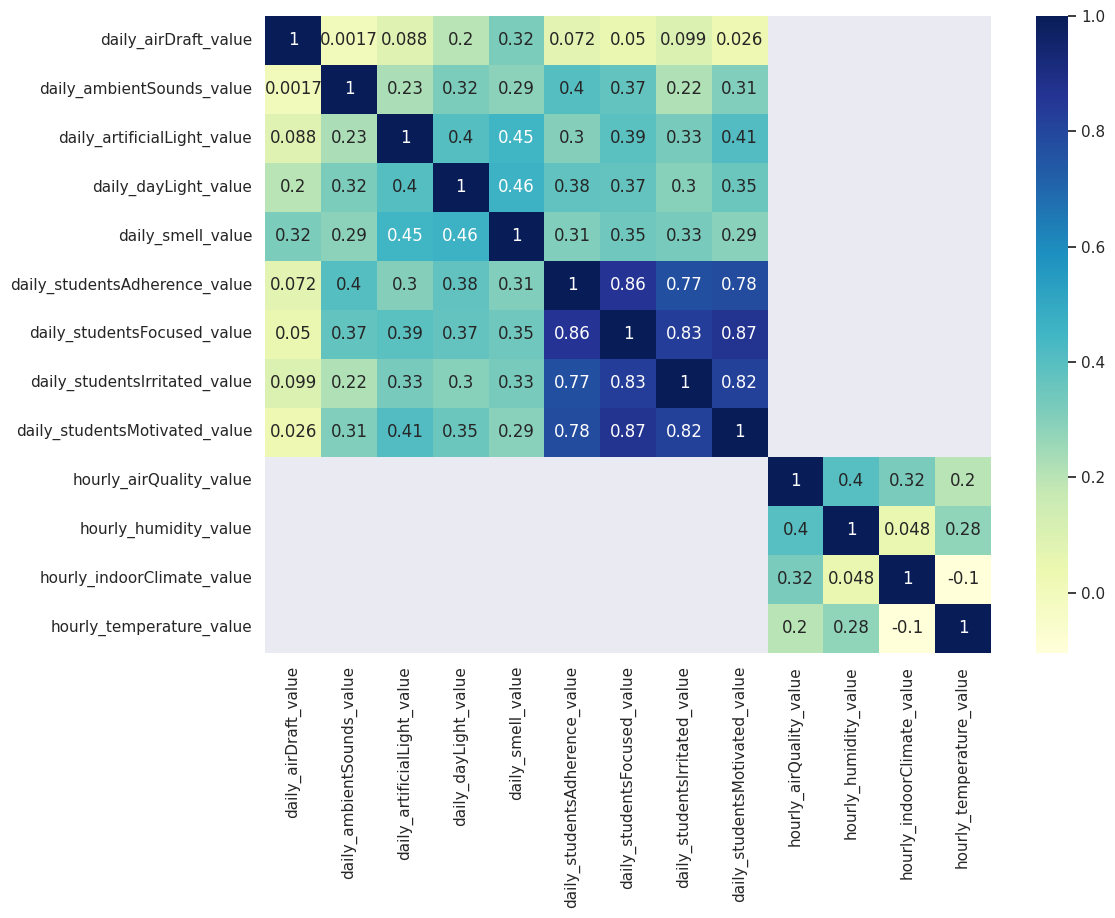

In [175]:

sns.set(rc={'figure.figsize':(11.7,8.27)})
# plotting correlation heatmap
feedback_dataplot = sns.heatmap(feedback_df.corr(), cmap="YlGnBu", annot=True)
feedback_dataplot.get_figure().savefig("../plots/correleation_plot.png",bbox_inches='tight')


Plotting with jitter to vizualise the relationship between student focus and smell

In [176]:
def Jitter(values, jitter):
    n = len(values)
    return np.random.uniform(-jitter, +jitter, n) + values


### Plotting affect on daily_studentsFocused_value

Daylight

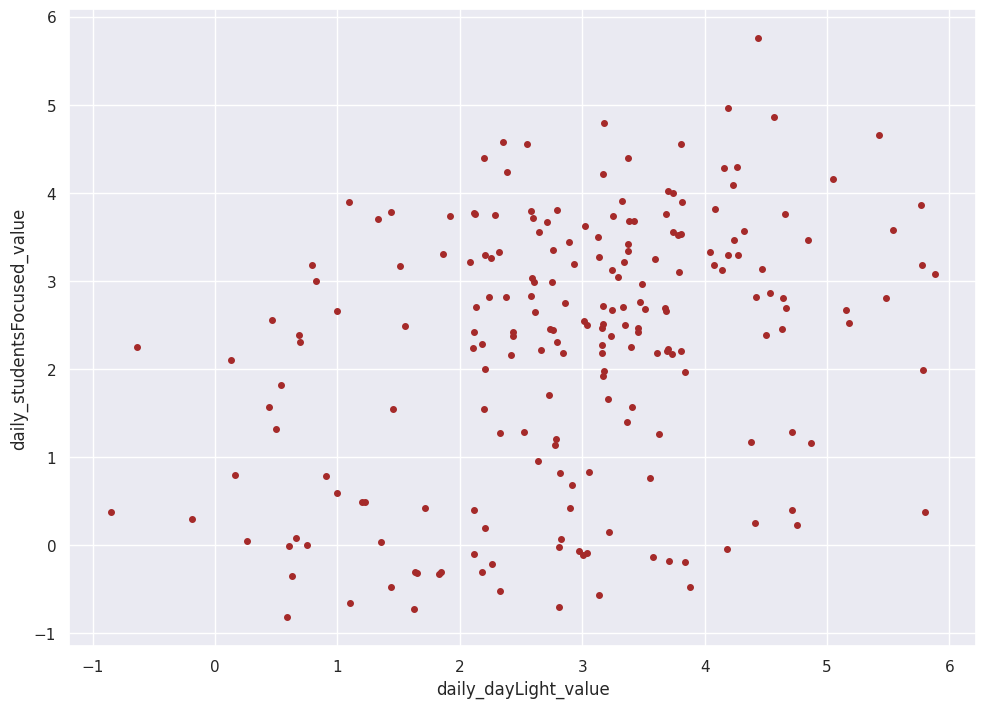

In [177]:
x1 = Jitter(feedback_df['daily_dayLight_value'],0.9)
y1 = Jitter(feedback_df['daily_studentsFocused_value'],0.9)
fig = plt.plot(x1,y1,'o',markersize=4, color='brown')
plt.ylabel('daily_studentsFocused_value')
plt.xlabel('daily_dayLight_value')
plt.savefig("../plots/daily_studentsFocused_value/daylight.png",bbox_inches='tight')


Artificial Light

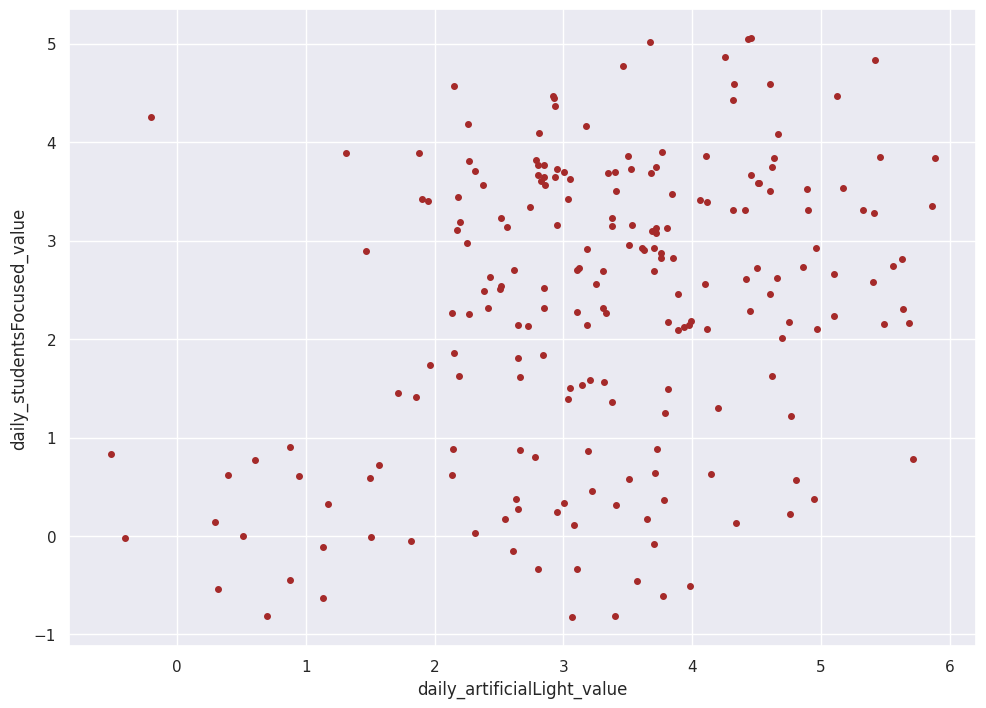

In [178]:

x1 = Jitter(feedback_df['daily_artificialLight_value'],0.9)
y1 = Jitter(feedback_df['daily_studentsFocused_value'],0.9)
plt.plot(x1,y1,'o',markersize=4, color='brown')
plt.xlabel('daily_artificialLight_value')
plt.ylabel('daily_studentsFocused_value')
plt.savefig("../plots/daily_studentsFocused_value/artificial_light.png",bbox_inches='tight')


Smell

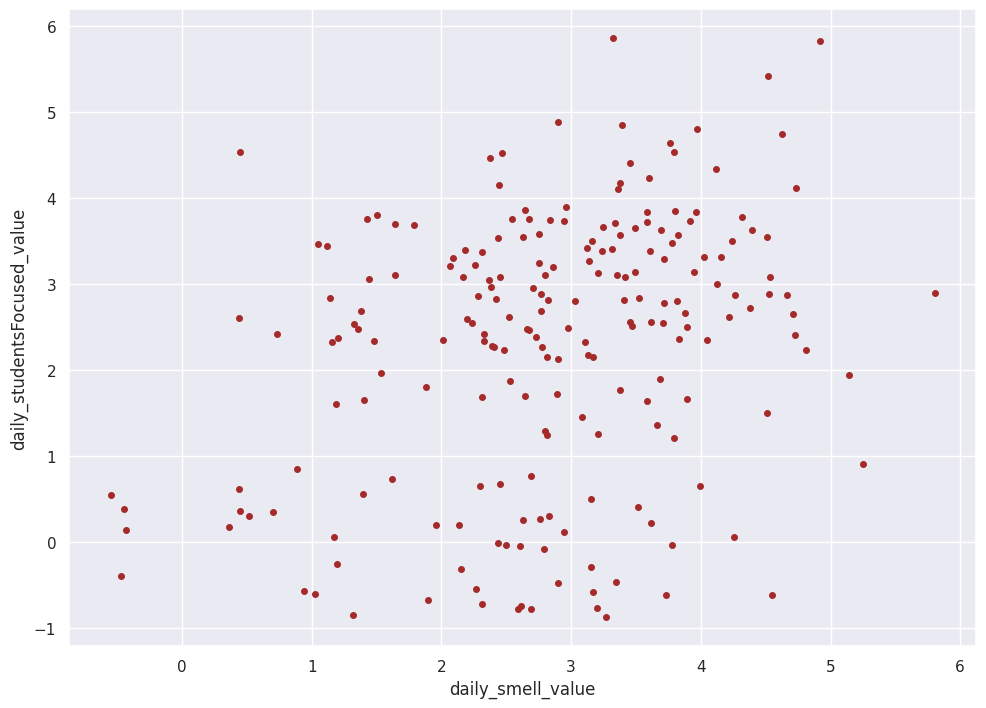

In [179]:
x1 = Jitter(feedback_df['daily_smell_value'],0.9)
y1 = Jitter(feedback_df['daily_studentsFocused_value'],0.9)
plt.plot(x1,y1,'o',markersize=4, color='brown')
plt.ylabel('daily_studentsFocused_value')
plt.xlabel('daily_smell_value')
plt.savefig("../plots/daily_studentsFocused_value/smell.png",bbox_inches='tight')

Ambient sounds

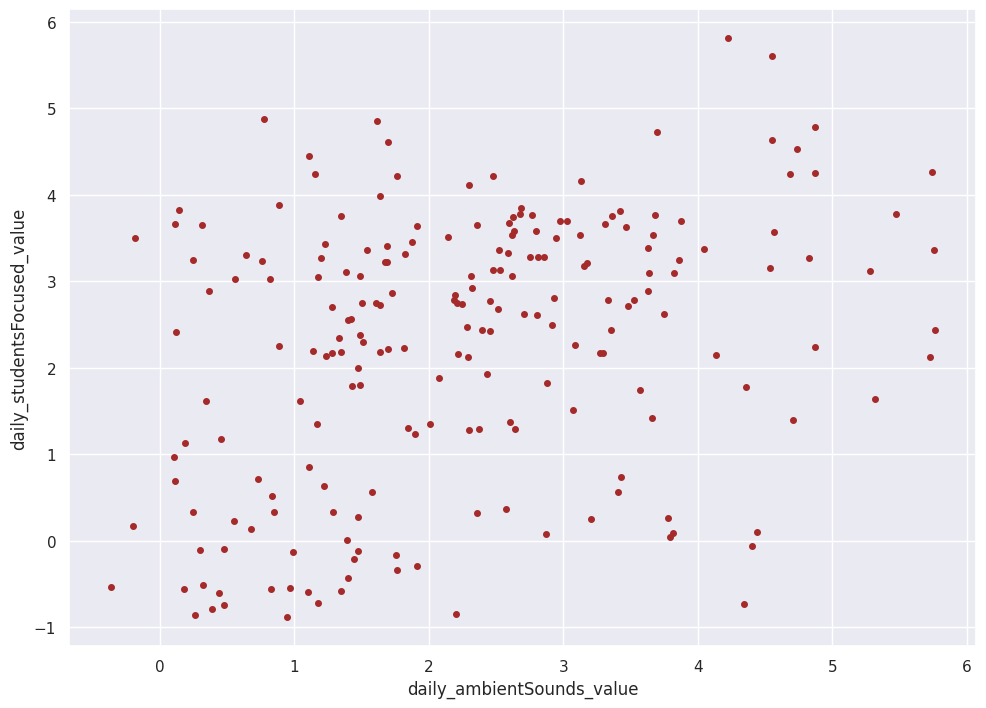

In [180]:
x1 = Jitter(feedback_df['daily_ambientSounds_value'],0.9)
y1 = Jitter(feedback_df['daily_studentsFocused_value'],0.9)
plt.plot(x1,y1,'o',markersize=4, color='brown')
plt.ylabel('daily_studentsFocused_value')
plt.xlabel('daily_ambientSounds_value')
plt.savefig("../plots/daily_studentsFocused_value/ambient_sounds.png",bbox_inches='tight')

### Plotting affect on daily_studentsIrritated_value

Daylight

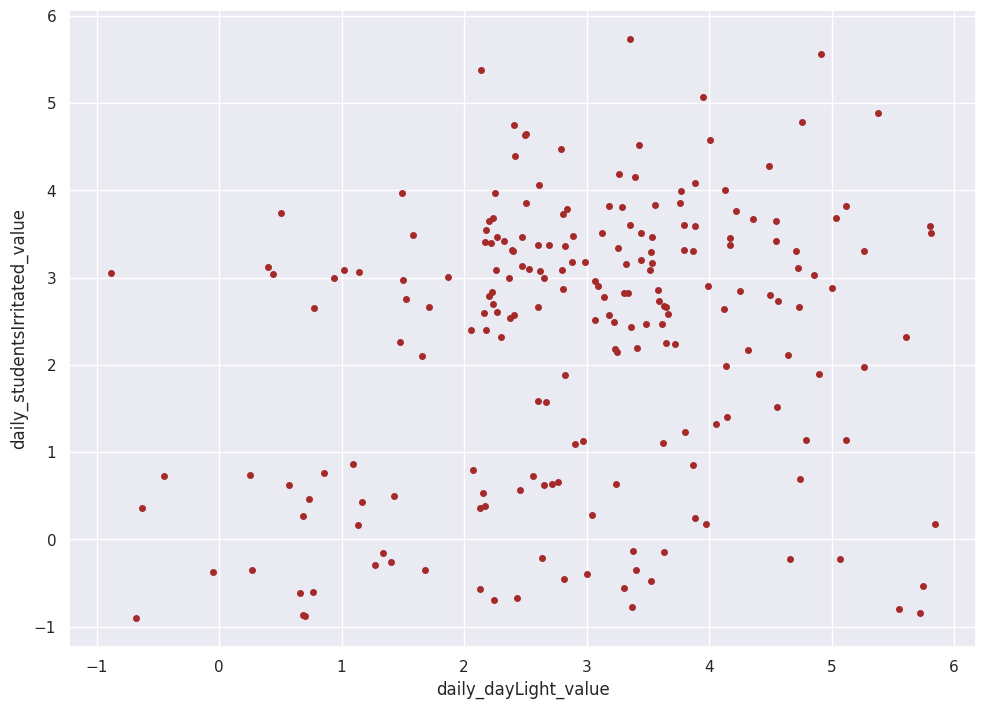

In [181]:
x1 = Jitter(feedback_df['daily_dayLight_value'],0.9)
y1 = Jitter(feedback_df['daily_studentsIrritated_value'],0.9)
plt.plot(x1,y1,'o',markersize=4, color='brown')
plt.ylabel('daily_studentsIrritated_value')
plt.xlabel('daily_dayLight_value')
plt.savefig("../plots/daily_studentsIrritated_value/daylight.png",bbox_inches='tight')

Artificial Light

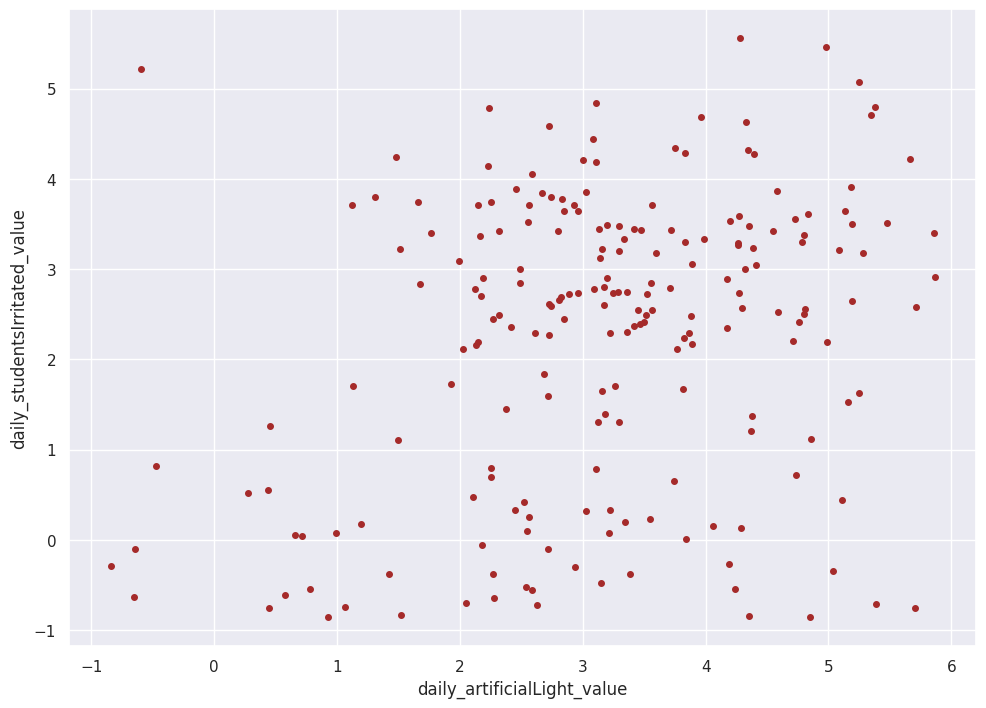

In [182]:

x1 = Jitter(feedback_df['daily_artificialLight_value'],0.9)
y1 = Jitter(feedback_df['daily_studentsIrritated_value'],0.9)
plt.plot(x1,y1,'o',markersize=4, color='brown')
plt.xlabel('daily_artificialLight_value')
plt.ylabel('daily_studentsIrritated_value')

plt.savefig("../plots/daily_studentsIrritated_value/artificial_light.png",bbox_inches='tight')

Smell

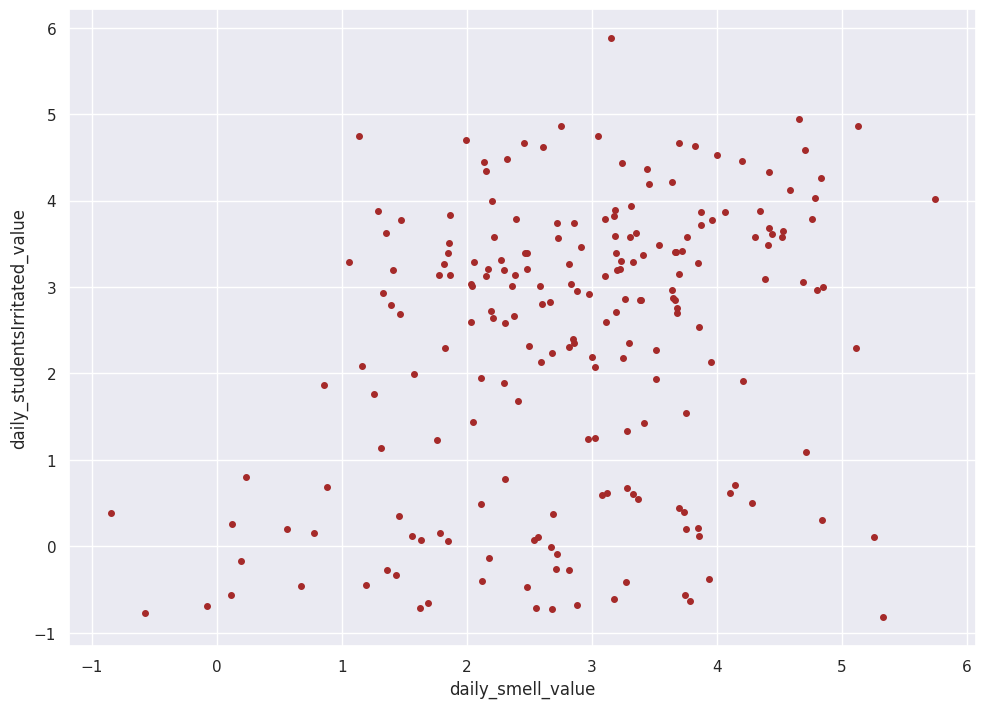

In [183]:
x1 = Jitter(feedback_df['daily_smell_value'],0.9)
y1 = Jitter(feedback_df['daily_studentsIrritated_value'],0.9)
plt.plot(x1,y1,'o',markersize=4, color='brown')
plt.ylabel('daily_studentsIrritated_value')
plt.xlabel('daily_smell_value')

plt.savefig("../plots/daily_studentsIrritated_value/smell.png",bbox_inches='tight')

Ambient sounds

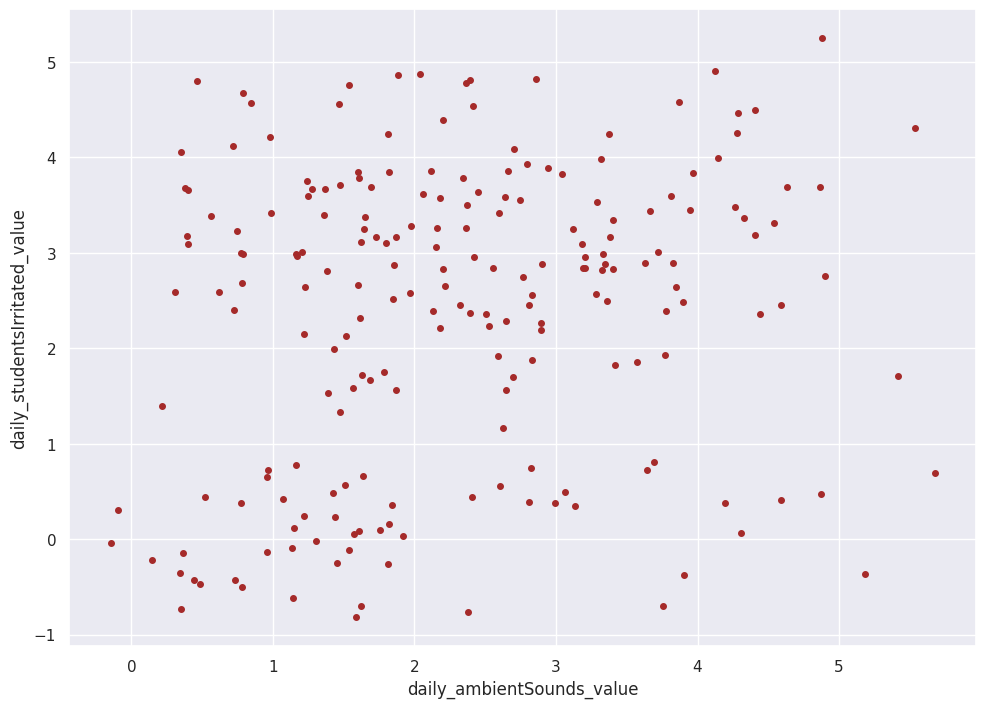

In [184]:
x1 = Jitter(feedback_df['daily_ambientSounds_value'],0.9)
y1 = Jitter(feedback_df['daily_studentsIrritated_value'],0.9)
plt.plot(x1,y1,'o',markersize=4, color='brown')
plt.ylabel('daily_studentsIrritated_value')
plt.xlabel('daily_ambientSounds_value')

plt.savefig("../plots/daily_studentsIrritated_value/ambient_sounds.png",bbox_inches='tight')

### Plotting affect on daily_studentsAdherence_value

Daylight

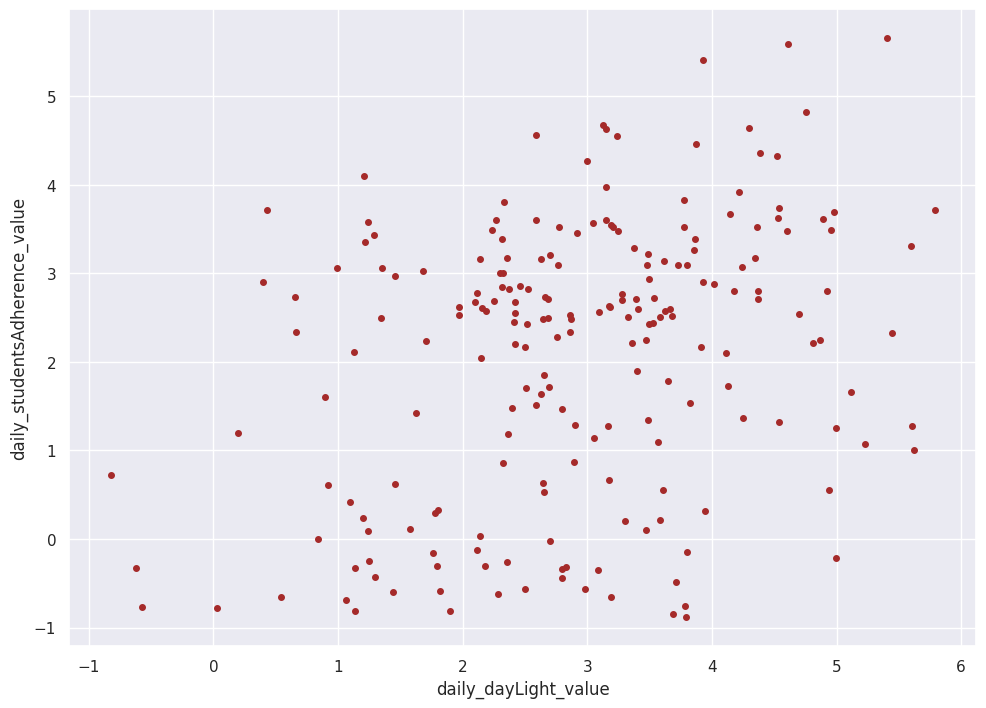

In [185]:
x1 = Jitter(feedback_df['daily_dayLight_value'],0.9)
y1 = Jitter(feedback_df['daily_studentsAdherence_value'],0.9)
plt.plot(x1,y1,'o',markersize=4, color='brown')
plt.ylabel('daily_studentsAdherence_value')
plt.xlabel('daily_dayLight_value')

plt.savefig("../plots/daily_studentsAdherence_value/daylight.png",bbox_inches='tight')

Artificial Light

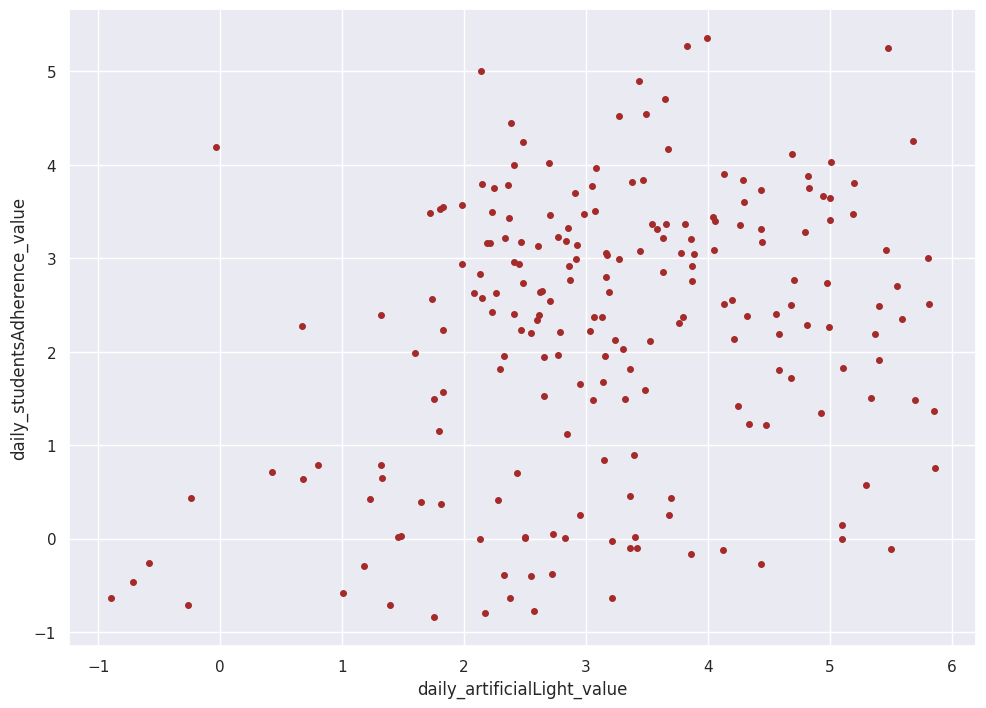

In [186]:

x1 = Jitter(feedback_df['daily_artificialLight_value'],0.9)
y1 = Jitter(feedback_df['daily_studentsAdherence_value'],0.9)
plt.plot(x1,y1,'o',markersize=4, color='brown')
plt.xlabel('daily_artificialLight_value')
plt.ylabel('daily_studentsAdherence_value')

plt.savefig("../plots/daily_studentsAdherence_value/artificial_light.png",bbox_inches='tight')

Smell

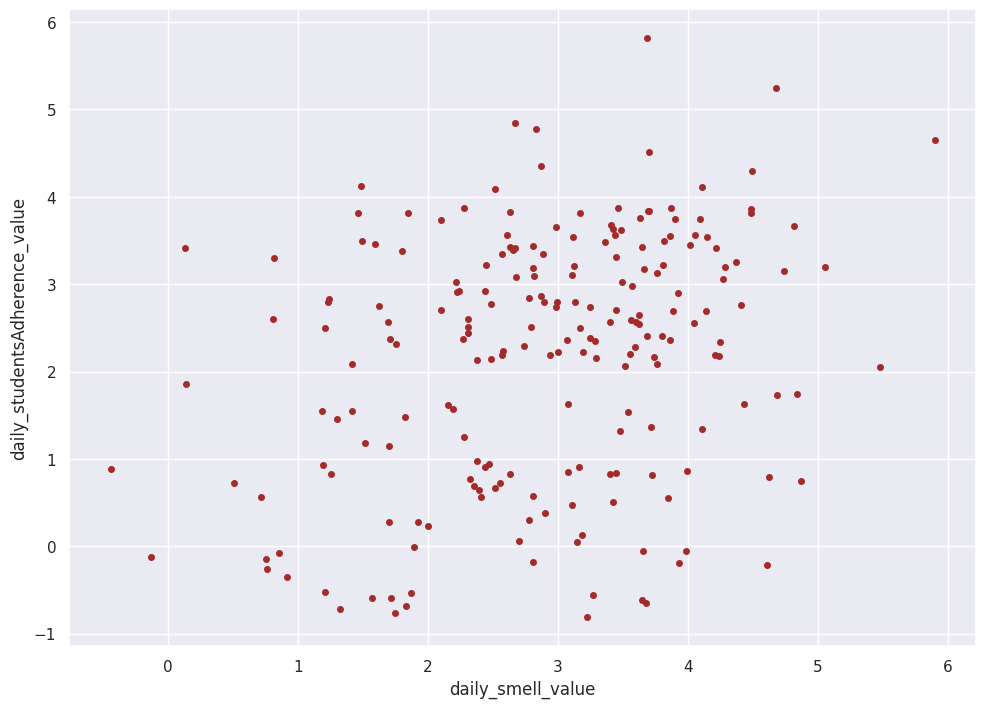

In [187]:
x1 = Jitter(feedback_df['daily_smell_value'],0.9)
y1 = Jitter(feedback_df['daily_studentsAdherence_value'],0.9)
plt.plot(x1,y1,'o',markersize=4, color='brown')
plt.ylabel('daily_studentsAdherence_value')
plt.xlabel('daily_smell_value')
plt.savefig("../plots/daily_studentsAdherence_value/smell.png",bbox_inches='tight')

Ambient sounds

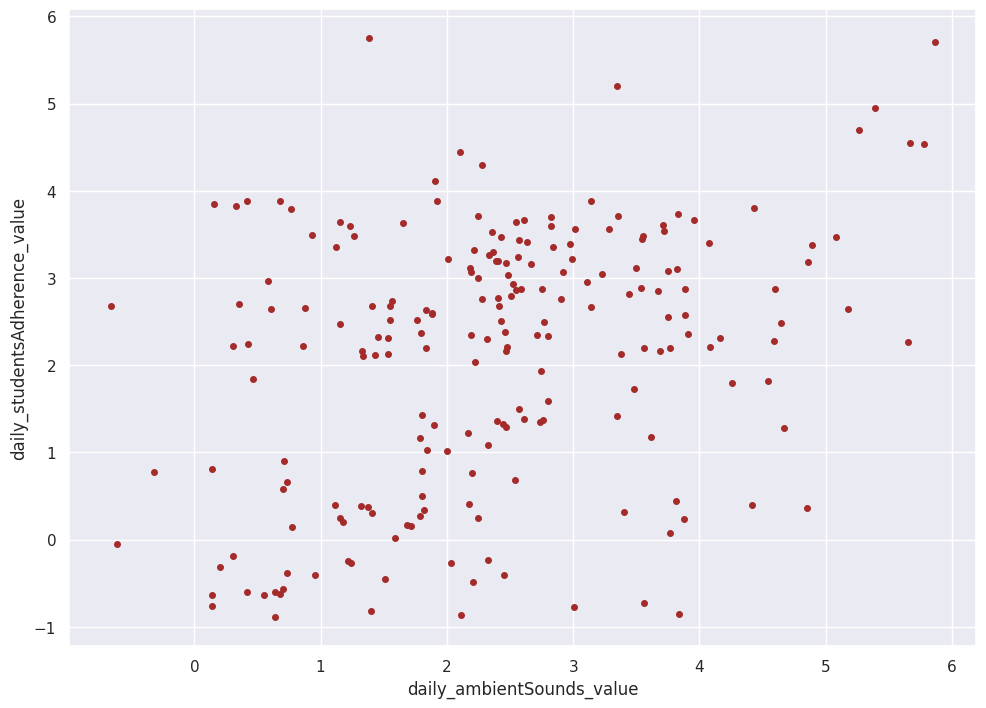

In [188]:
x1 = Jitter(feedback_df['daily_ambientSounds_value'],0.9)
y1 = Jitter(feedback_df['daily_studentsAdherence_value'],0.9)
plt.plot(x1,y1,'o',markersize=4, color='brown')
plt.ylabel('daily_studentsAdherence_value')
plt.xlabel('daily_ambientSounds_value')
plt.savefig("../plots/daily_studentsAdherence_value/ambient_sounds.png",bbox_inches='tight')

### Plotting affect on daily_studentsMotivated_value

Daylight

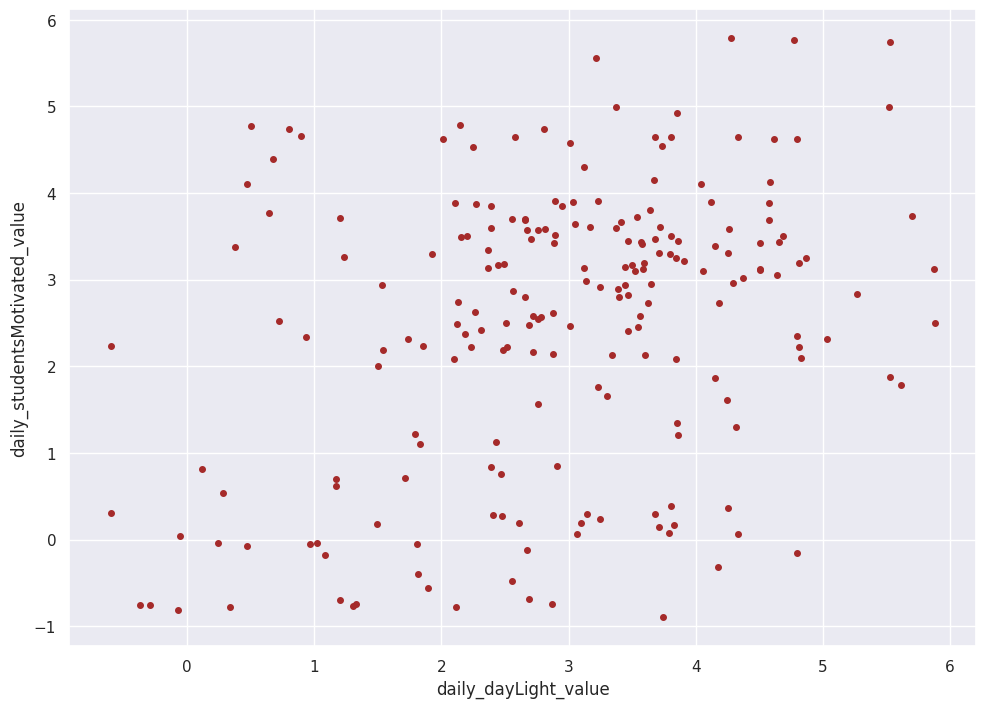

In [189]:
x1 = Jitter(feedback_df['daily_dayLight_value'],0.9)
y1 = Jitter(feedback_df['daily_studentsMotivated_value'],0.9)
plt.plot(x1,y1,'o',markersize=4, color='brown')
plt.ylabel('daily_studentsMotivated_value')
plt.xlabel('daily_dayLight_value')
plt.savefig("../plots/daily_studentsMotivated_value/daylight.png",bbox_inches='tight')

Artificial Light

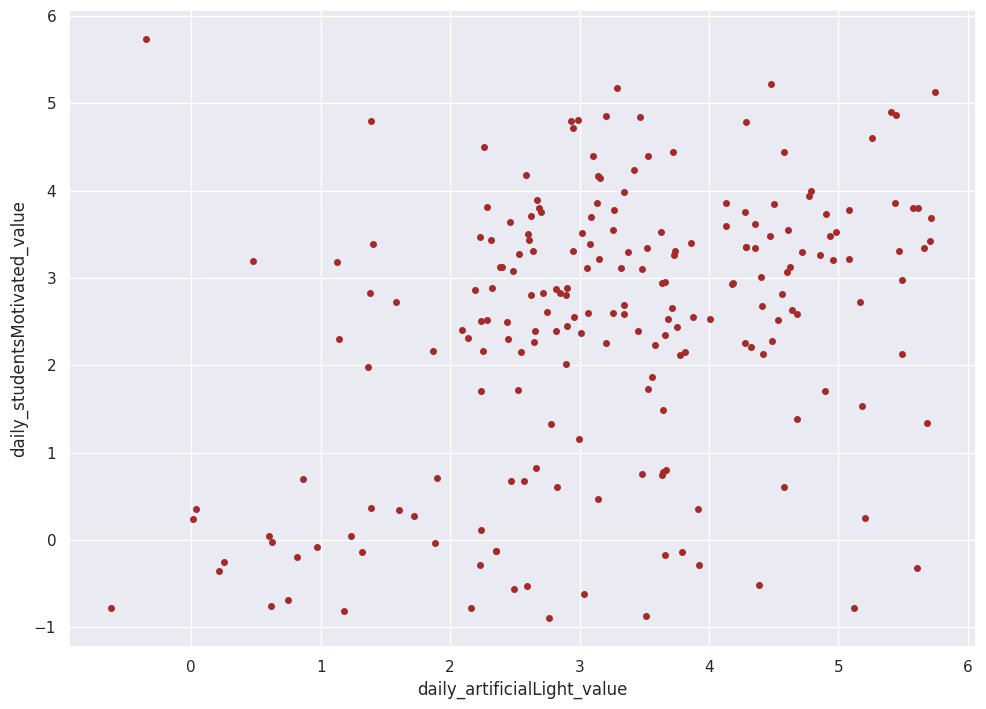

In [190]:

x1 = Jitter(feedback_df['daily_artificialLight_value'],0.9)
y1 = Jitter(feedback_df['daily_studentsMotivated_value'],0.9)
plt.plot(x1,y1,'o',markersize=4, color='brown')
plt.xlabel('daily_artificialLight_value')
plt.ylabel('daily_studentsMotivated_value')
plt.savefig("../plots/daily_studentsMotivated_value/artificial_light.png",bbox_inches='tight')

Smell

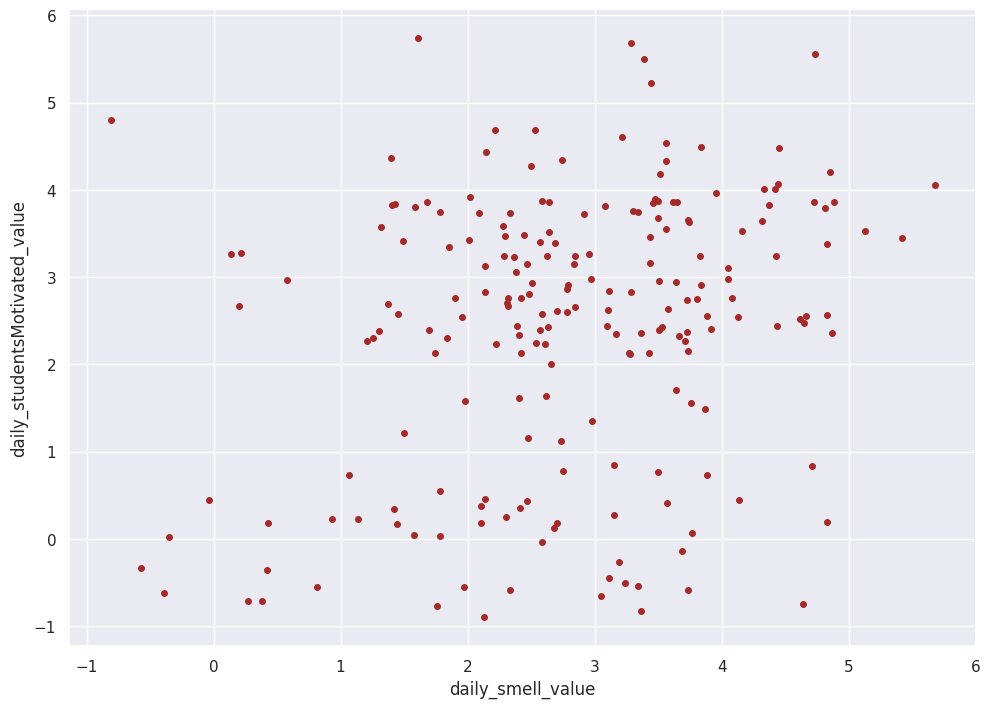

In [191]:
x1 = Jitter(feedback_df['daily_smell_value'],0.9)
y1 = Jitter(feedback_df['daily_studentsMotivated_value'],0.9)
plt.plot(x1,y1,'o',markersize=4, color='brown')
plt.ylabel('daily_studentsMotivated_value')
plt.xlabel('daily_smell_value')
plt.savefig("../plots/daily_studentsMotivated_value/smell.png",bbox_inches='tight')

Ambient sounds

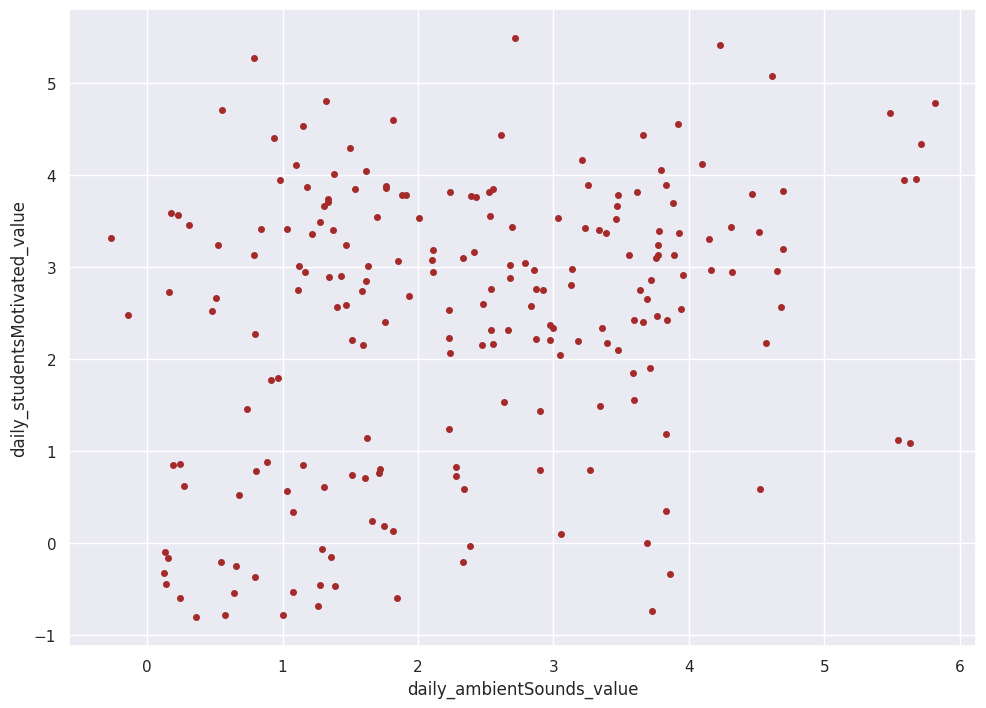

In [192]:
x1 = Jitter(feedback_df['daily_ambientSounds_value'],0.9)
y1 = Jitter(feedback_df['daily_studentsMotivated_value'],0.9)
plt.plot(x1,y1,'o',markersize=4, color='brown')
plt.ylabel('daily_studentsMotivated_value')
plt.xlabel('daily_ambientSounds_value')
plt.savefig("../plots/daily_studentsMotivated_value/ambient_sounds.png",bbox_inches='tight')

### Teachers' comments

Translating teachers' comments to English

In [195]:
from deep_translator import GoogleTranslator

In [196]:
feedback_df['daily_additionalComment_value_english'] = feedback_df['daily_additionalComment_value'].dropna().apply(GoogleTranslator(source='auto', target='en').translate)

In [201]:
for sent in feedback_df['daily_additionalComment_value_english'].dropna().drop_duplicates():
    print(sent)

Too warm. Difficult to ventilate due to noise level
When More than 15 students Are in the Music room, it gets very warm and feels livke the air is Thick and muggy.
If possible, 2 windows are always open.
Rainy day
Whenever possible, the balcony door and the window are opened or the door to the learning landscape.
Windows as often as possible
Today the air was okay when coming. During the day, as always, airing took place at every opportunity.
No sun, it was raining.
Either the windows are open and noisy, or the windows are closed and the air is bad.
air!
Constant airing
Cold blustery weather
Permanently ventilated
Temp. only pleasant with the windows open. However, the sunlight then dazzles again and the traffic noise disturbs.
With downloaded sun protection
IT was very warm, but i opened the Windows and all was fine
Constant ventilation if possible
Permanently ventilated
Airing does not cause drafts to come from the ventilation
Ventilated if possible
group division
I had to open the w

With windows closed it is often mentioned that it is too warm or too stuffy inside.


In general the teachers' comments were that the room air only feels pleasant when the windows are open but this has problems:
- when windows are open it is often too noisy (traffic noise)
- It could be raining so not possible to open windows